## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
#inject data to dataset
ds_bike = pd.read_csv("day.csv")

In [4]:
ds_bike.shape

(730, 16)

In [5]:
ds_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No null values and the fields are in correct data type 
except dteday which may require conversion to date type 

In [6]:
ds_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
ds_bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [8]:
# check the descriptive statistics of the dataset
ds_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Analysis from data head/tail
    1. instant is a S No can be used as number of days to check for any cyclicity in demand .Should be dropped during liner regression modelling 
    2. dte day may be redundant as month and year provided
    3. weekday and working days are already in variables 
    4. cnt = causal + registered . So both can dropped


## Step 1: Pre processsing the dataset 

In [9]:
# Drop the columns casual and registered
ds_bike = ds_bike.drop(['casual', 'registered'], axis = 1)

In [10]:
# Mapping the categorical variables 

ds_bike['season'] = ds_bike['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

ds_bike['weathersit'] = ds_bike['weathersit'].map({
    1: 'clear',
    2: 'cloudy_mist',
    3: 'light_snow',    
    4: 'Heavy_rain_ice'
})

ds_bike['mnth'] = ds_bike['mnth'].map({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
  
})

ds_bike['weekday'] = ds_bike['weekday'].map({
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat'
  
})

ds_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,cloudy_mist,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,cloudy_mist,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
ds_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 80.0+ KB


## Step 3: Visualising the Data/ Explanatory Data Analysis 

<Axes: xlabel='instant'>

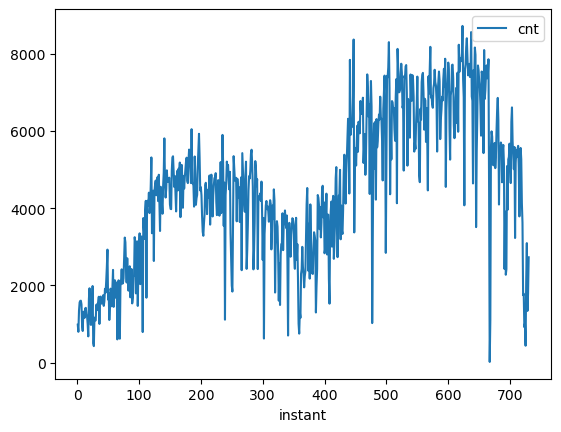

In [12]:
# analysis to check if there is cyclic pattern over the days- ups and downs
ds_bike.plot.line(x='instant', y='cnt')



Text(0, 0.5, 'Count')

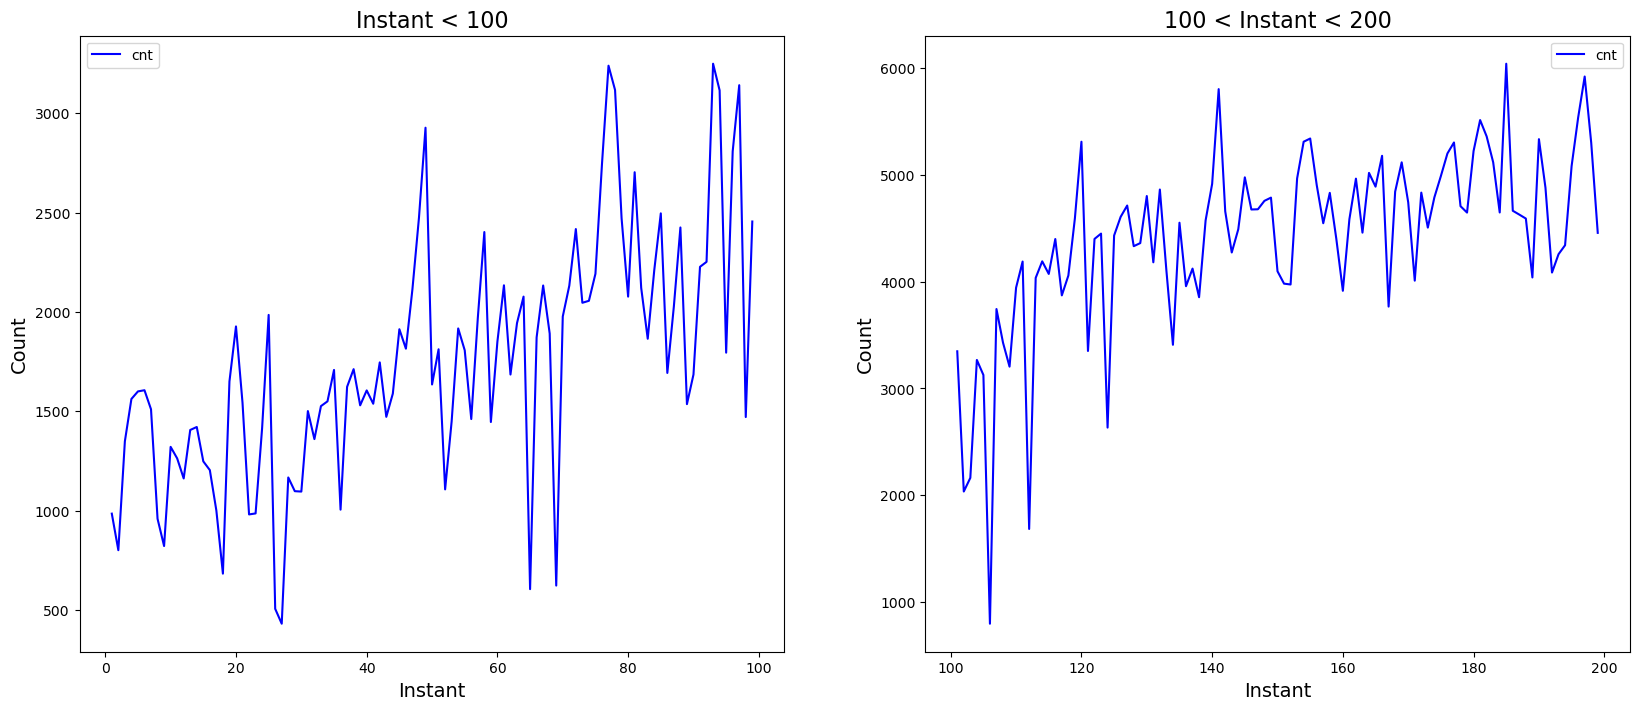

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

ds_bike[ds_bike['instant'] < 100].plot.line(x='instant', y='cnt',ax=axes[0], color='blue')
axes[0].set_title('Instant < 100', fontsize=16)
axes[0].set_xlabel('Instant', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)

ds_bike[(ds_bike['instant'] > 100) & (ds_bike['instant'] < 200)].plot.line(x='instant', y='cnt',ax=axes[1], color='blue')
axes[1].set_title('100 < Instant < 200', fontsize=16)
axes[1].set_xlabel('Instant', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)

There is a no distinct pattern in the cyclicity , no increase in weekend vs weekday. Gradual increase with highs and troughs

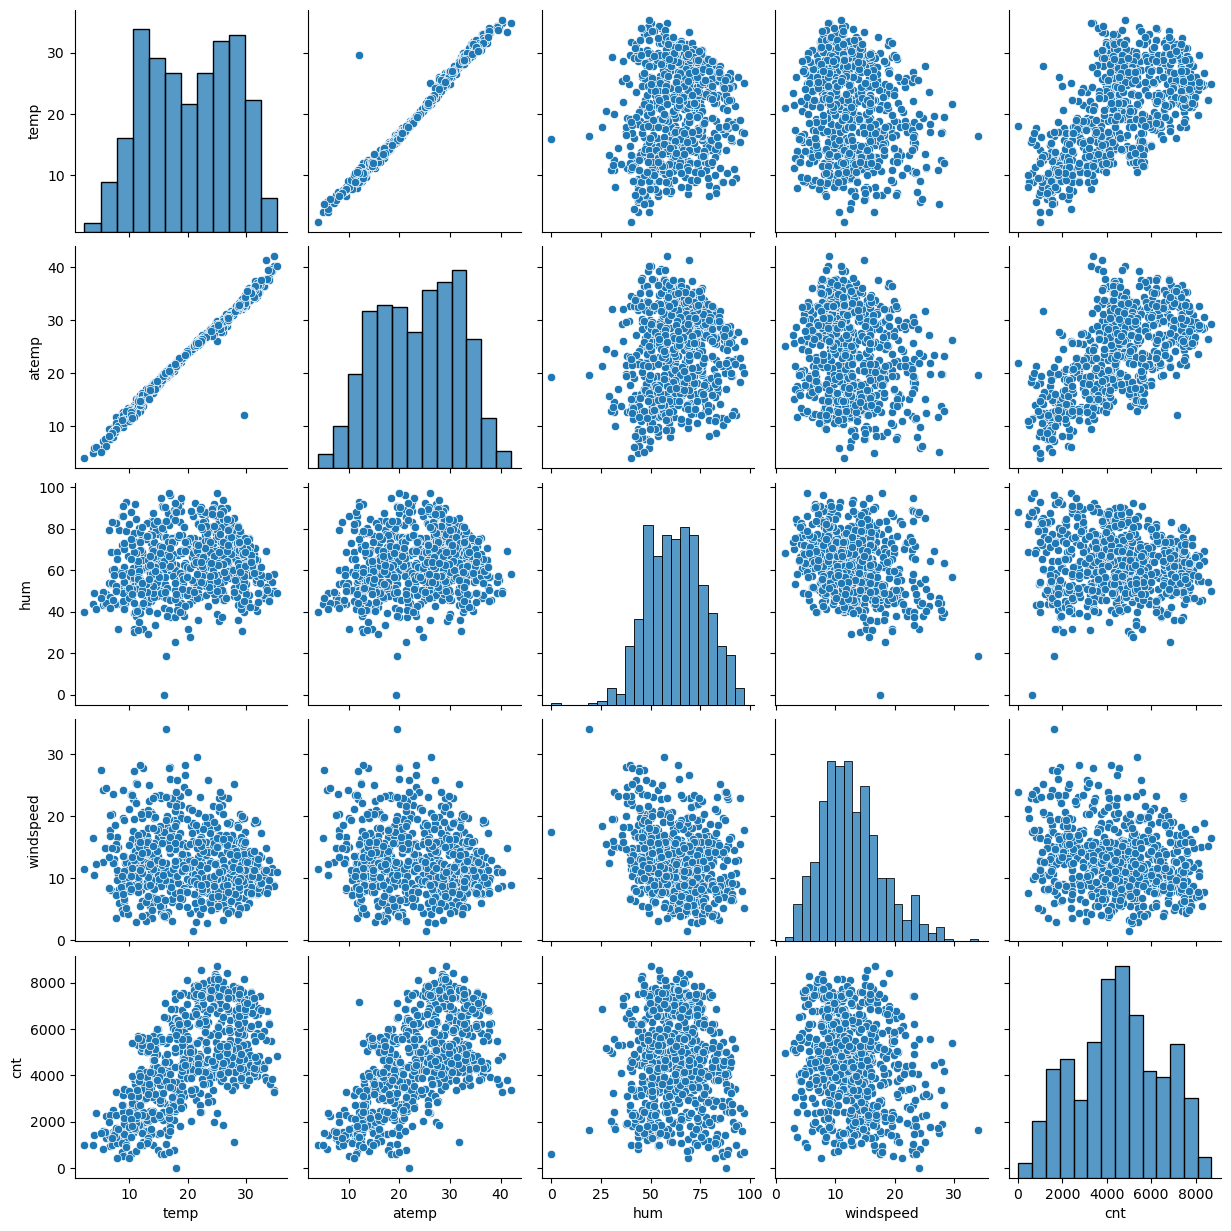

In [14]:
#checking the  Linearity and multi collenarity through visual inspection

# Visualizing the numerical variables 
intrested_cols= ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(ds_bike[intrested_cols])
plt.show()

<Axes: >

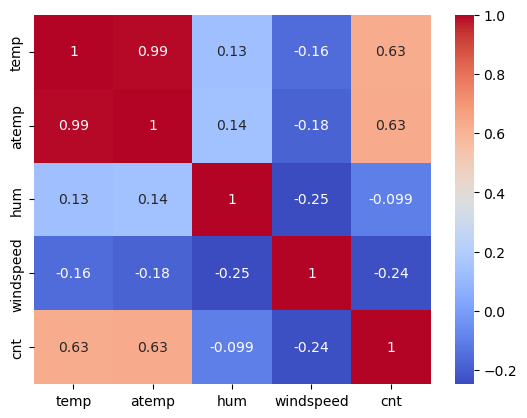

In [15]:
sns.heatmap(ds_bike[intrested_cols].corr(), annot=True, cmap='coolwarm')

Inputs from Scatter plot and coorelation matrix 

a. CNT has some linear relationship with temp/atemp
b. temp /atemp - which have very high  multi collinearity /One of them should be droped 
c. humidity and windspeed don't seem like impact much to cnt. Also the linear relatoionship between Humity, Wimdspeed amd cnt not that evident 

<Axes: xlabel='yr', ylabel='cnt'>

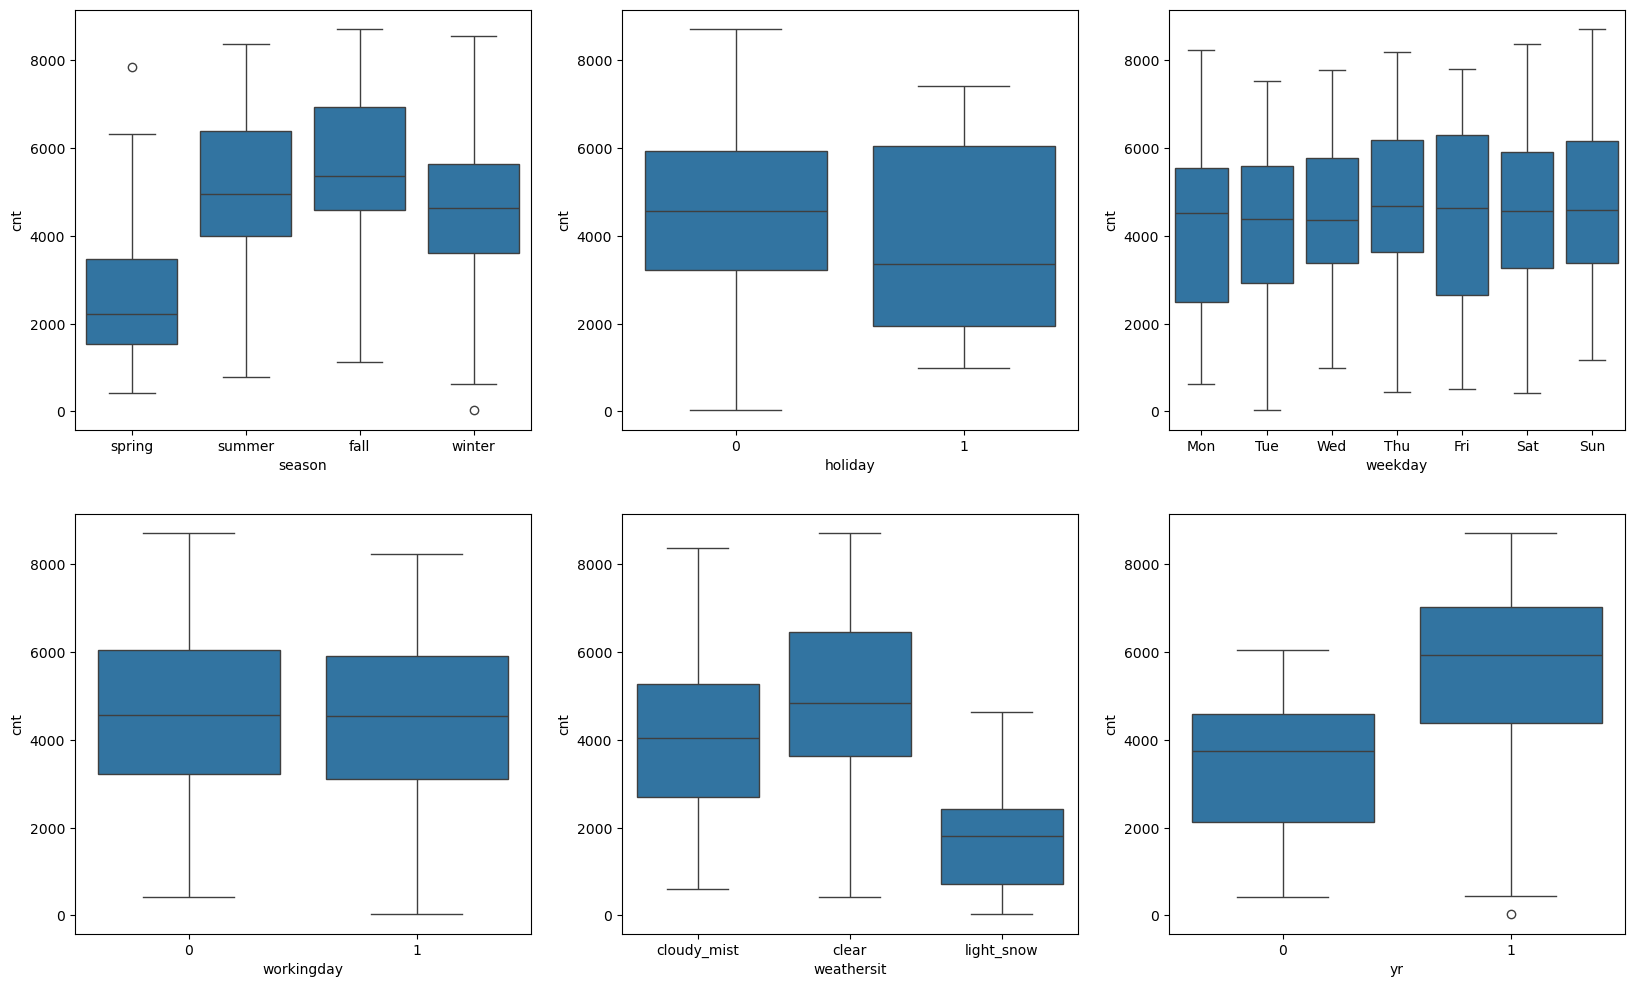

In [16]:
# Visualizing impact of categorical variables on cnt 
#categorical_vars = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(20, 12))
# two row three cols and this is first one 
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = ds_bike)
# two row three cols and this is 2nd one 
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = ds_bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = ds_bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = ds_bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = ds_bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = ds_bike)


<Axes: xlabel='mnth', ylabel='cnt'>

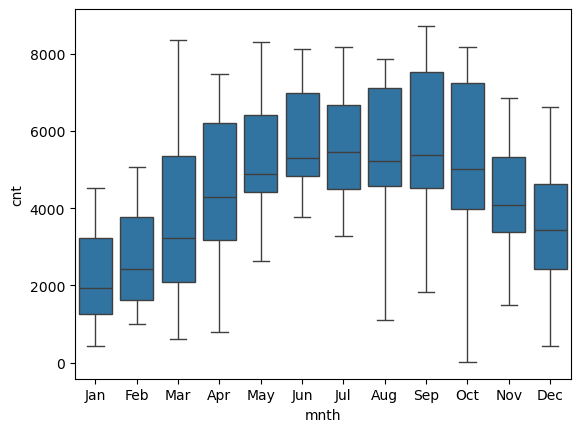

In [17]:

sns.boxplot(x = 'mnth', y = 'cnt', data = ds_bike)

Inputs from Categotical values analysis 

1. Season has impact - 1:spring has lowest bike interest, while Fall has maximum followed by summer . 
2. Holiday 1 is holiday and 0 not holiday - Holidays people don't use bike as much as other days
3. weekdays and working days don't have any impact on bike 
4. Weather sit - while there are no observations for Heavy rain , people prefer clear weather over mist and snow

<Axes: ylabel='windspeed'>

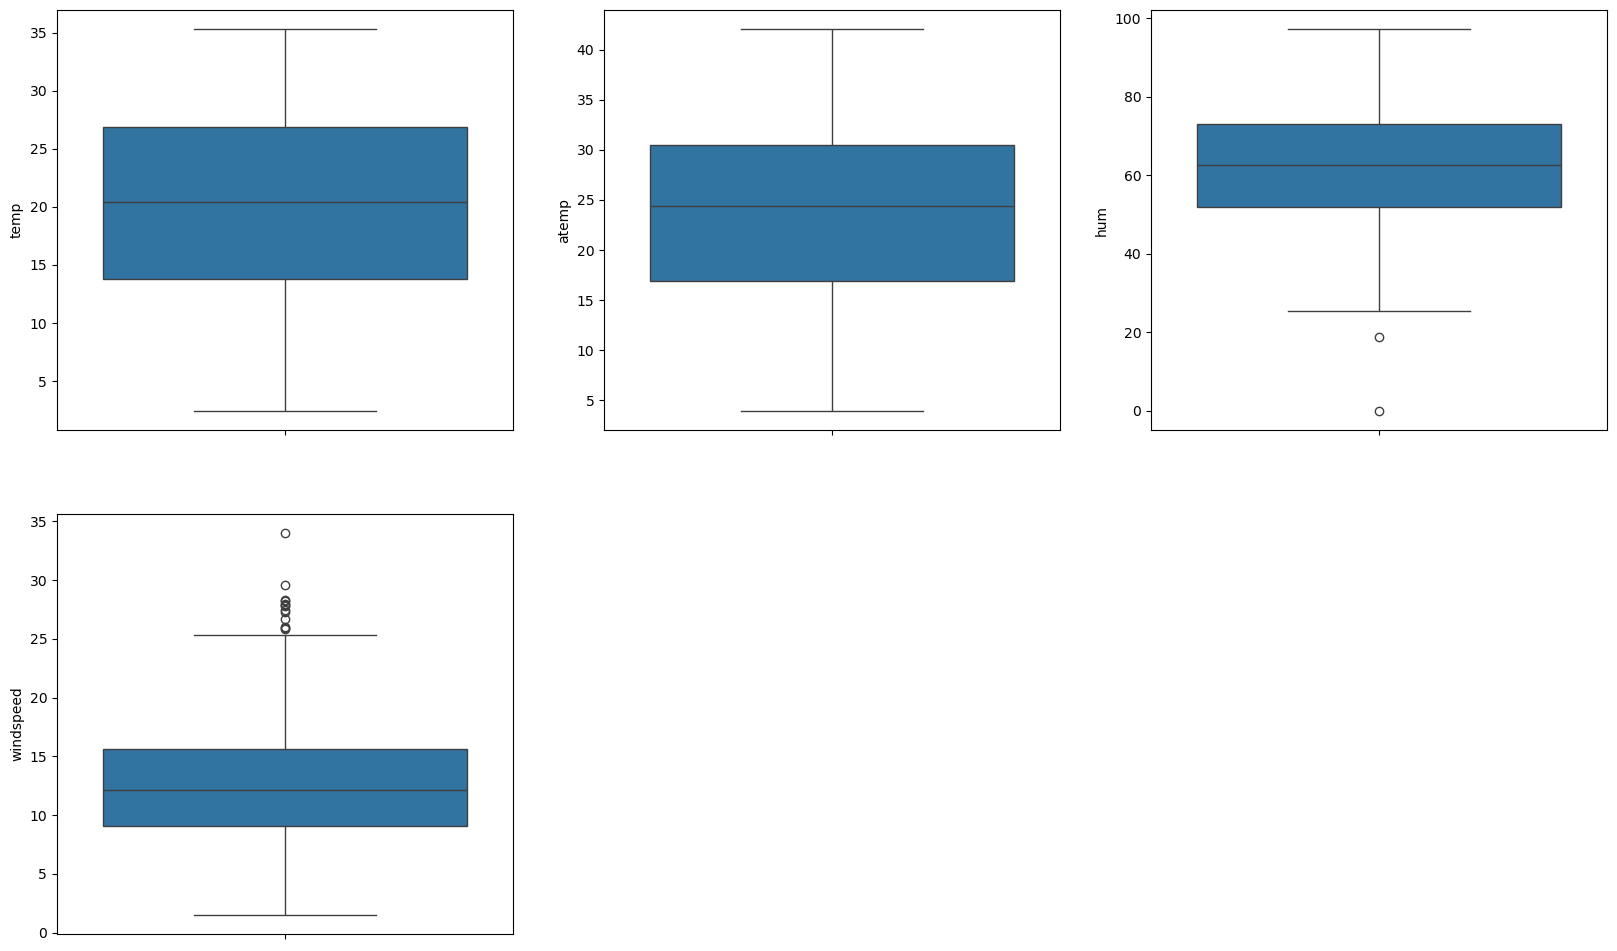

In [18]:
#Check if there are any major outliers in the data through boxplot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(ds_bike['temp'])
plt.subplot(2,3,2)
sns.boxplot(ds_bike['atemp'])
plt.subplot(2,3,3)
sns.boxplot(ds_bike['hum'])
plt.subplot(2,3,4)
sns.boxplot(ds_bike['windspeed'])




Insights from box plot 
a. Humidity has two observations outside of the box  
b. windspeed has some observations outside of the box
But they are not outliers as range difference is not that high.Also we will do scale it to handle the impact of outliers 


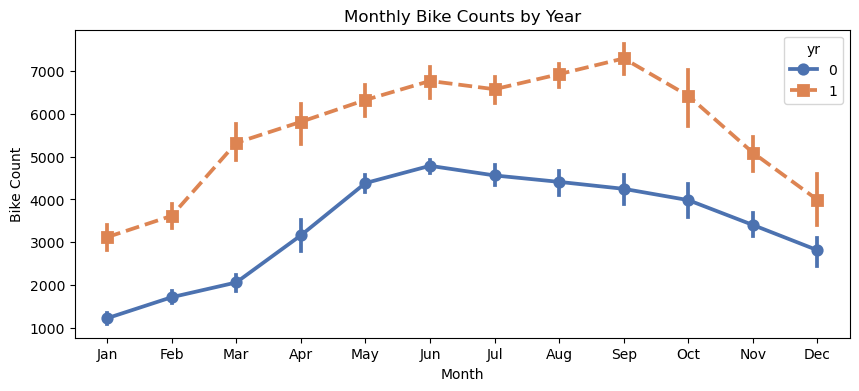

In [19]:
# Year on Year growth of Total Rented Bikes
plt.figure(figsize=(10,4))
sns.pointplot(x='mnth', y='cnt', data=ds_bike, hue='yr', palette='deep',markers=['o', 's'], linestyles=['-', '--'])
ds_bike.groupby(['yr']).sum()['cnt']
plt.title('Monthly Bike Counts by Year')
plt.xlabel('Month')
plt.ylabel('Bike Count')
plt.show()

Step 3: Data Preparation

In [20]:
# create a backup of the dataset to refresh if required 
ds_bike_backup = ds_bike.copy()
ds_bike_backup.shape

(730, 14)

In [311]:

# restore the backup if required 
#ds_bike = ds_bike_backup.copy()

In [21]:
# dropping the columns which are not required - instant, dteday 
# instant - is just a serial number
# dteday - is not required as we have other columns like weekday , weekend, month, year  can give us the same information  
ds_bike.drop(['instant', 'dteday'], axis=1, inplace=True)


In [22]:
ds_bike.shape

(730, 12)

In [23]:
ds_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [24]:
ds_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,cloudy_mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,cloudy_mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
#Converting the categorical values from int to string 
categorical_vars = ['season', 'mnth','weekday', 'weathersit']
ds_bike[categorical_vars] = ds_bike[categorical_vars].astype('category')

In [26]:
#handling the categorical variables
# Converting the categorical variables to dummy variables
ds_bike = pd.get_dummies(ds_bike, drop_first=True,dtype=int)


In [27]:
ds_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   season_spring           730 non-null    int32  
 9   season_summer           730 non-null    int32  
 10  season_winter           730 non-null    int32  
 11  mnth_Aug                730 non-null    int32  
 12  mnth_Dec                730 non-null    int32  
 13  mnth_Feb                730 non-null    int32  
 14  mnth_Jan                730 non-null    in

In [28]:
ds_bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_cloudy_mist,weathersit_light_snow
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 5: Building a linear model

In [29]:
# Train Test Split
from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(ds_bike, train_size = 0.7,test_size = 0.3, random_state = 100)
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(219, 30)


In [30]:
#Scaling the train dataset
num_vars = ['temp','atemp','hum','windspeed','cnt']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
# only transform the test dataset
bike_test[num_vars] = scaler.transform(bike_test[num_vars])




In [31]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_cloudy_mist,weathersit_light_snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_cloudy_mist,weathersit_light_snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# creating x and y training datasets for linear regression

y_train = bike_train['cnt']
X_train = bike_train.drop('cnt', axis=1)

# creating x and y test datasets
y_test = bike_test['cnt']
X_test = bike_test.drop('cnt', axis=1)



In [34]:
# check the shape of the train and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((510, 29), (219, 29), (510,), (219,))

Feature selection using RFE 

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Initialize a model
lm= LinearRegression()

# create the RFE model and select 15 attributes
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE on X_train and y_train
rfe.fit(X_train, y_train)

# Get selected feature names with ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))



[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 11),
 ('weathersit_cloudy_mist', True, 1),
 ('weathersit_light_snow', True, 1)]

In [37]:
# Extract the columns which are selected by RFE
selected_features=X_train.columns[rfe.support_]
print(selected_features)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_cloudy_mist',
       'weathersit_light_snow'],
      dtype='object')


In [38]:
# Transform X_train and X_test to contain only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [39]:
X_train_selected.describe()
X_test_selected.describe()

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_cloudy_mist,weathersit_light_snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.558941,0.638508,0.313350,0.255708,0.264840,0.232877,0.086758,0.077626,0.105023,0.073059,0.086758,0.319635,0.027397
std,0.500722,0.188034,0.233698,0.148974,0.159947,0.437258,0.442259,0.423633,0.282125,0.268194,0.307285,0.260830,0.282125,0.467403,0.163612
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558691,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.759096,0.743928,0.403048,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Modelling
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_selected)
X_test_lm=sm.add_constant(X_test_selected)


# Create a first fitted model
lr1 = sm.OLS(np.array(y_train), X_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          3.34e-189
Time:                        09:01:05   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [41]:
# Check for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor  

vif = pd.DataFrame()    
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# don't inclue the constant in the VIF calculation

,Features,VIF
0,const,82.48
6,season_spring,5.27
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.76
4,hum,1.93
12,mnth_Nov,1.76
10,mnth_Jan,1.68
14,weathersit_cloudy_mist,1.57
9,mnth_Dec,1.49


In [42]:
# Manual adjustment - season_spring has very high VIF dropping the season_spring and checking in a new model 
X_train_selected = X_train_selected.drop('season_spring', axis=1)
X_test_selected = X_test_selected.drop('season_spring', axis=1)

In [43]:
# Modelling
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_selected)
X_test_lm=sm.add_constant(X_test_selected)


# Create a first fitted model
lr2 = sm.OLS(np.array(y_train), X_train_lm).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          1.54e-188
Time:                        09:01:34   Log-Likelihood:                 510.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [44]:
vif = pd.DataFrame()    
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.75
3,temp,2.32
7,season_winter,2.08
4,hum,1.90
11,mnth_Nov,1.70
9,mnth_Jan,1.67
13,weathersit_cloudy_mist,1.55
8,mnth_Dec,1.47
6,season_summer,1.44
10,mnth_Jul,1.43


There are two variables with P value more than 0.05 - mnth_Nov and mnth_Dec


In [45]:
#droppping mnth_Nov as it has high p value 

X_train_selected = X_train_selected.drop('mnth_Nov', axis=1)
X_test_selected = X_test_selected.drop('mnth_Nov', axis=1)

In [46]:
# Modelling
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_selected)
X_test_lm=sm.add_constant(X_test_selected)


# Create a first fitted model
lr3 = sm.OLS(np.array(y_train), X_train_lm).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          4.25e-189
Time:                        09:01:55   Log-Likelihood:                 508.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [47]:
vif = pd.DataFrame()    
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.82
3,temp,2.25
4,hum,1.90
9,mnth_Jan,1.63
7,season_winter,1.55
12,weathersit_cloudy_mist,1.55
6,season_summer,1.43
10,mnth_Jul,1.43
8,mnth_Dec,1.26
13,weathersit_light_snow,1.25


In [48]:
#droppping mnth_Dec  as it has high p value 

X_train_selected = X_train_selected.drop('mnth_Dec', axis=1)
X_test_selected = X_test_selected.drop('mnth_Dec', axis=1)

In [49]:
# Modelling
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_selected)
X_test_lm=sm.add_constant(X_test_selected)


# Create a first fitted model
lr4 = sm.OLS(np.array(y_train), X_train_lm).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          6.03e-190
Time:                        09:02:21   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [50]:
vif = pd.DataFrame()    
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.60
3,temp,2.06
4,hum,1.88
8,mnth_Jan,1.55
11,weathersit_cloudy_mist,1.55
7,season_winter,1.53
9,mnth_Jul,1.43
6,season_summer,1.41
12,weathersit_light_snow,1.24
5,windspeed,1.19


lr4 seems like a good model as the VIF less than 5 and P values are less than 0.05 

In [51]:

# predict the y values from train and test datasets to compare the R2 values

y_train_pred=lr4.predict(X_train_lm)
y_test_pred=lr4.predict(X_test_lm)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("R2 Train:",round(r2_train,3),"R2 Test:",round(r2_test,3))

R2 Train: 0.841 R2 Test: 0.803


R2 is comparable for both Train and Test sets 

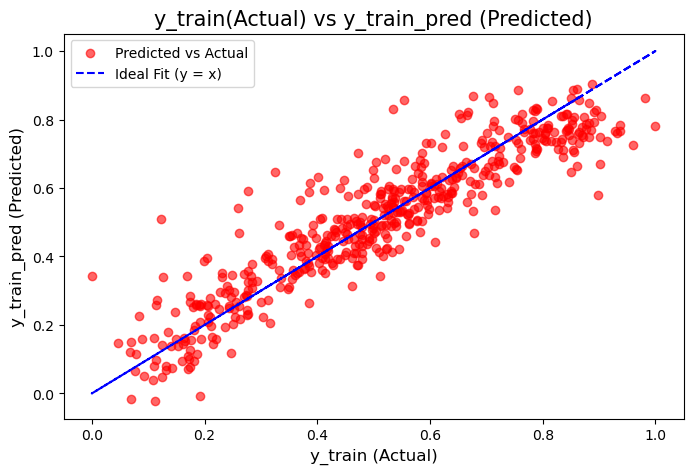

In [52]:
# Plotting to check the y actuals vs y predicted for training dataset . 
# Scatter Plot with y_train on x-axis and y_train_pred on y-axis 
# This directly visualizes how close predictions are to the actual values.
# A perfect model would align all points on the diagonal line (y_actual = y_pred).
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(y_train, y_train_pred, color='red', alpha=0.6, label='Predicted vs Actual')
plt.plot(y_train, y_train, color='blue', linestyle='--', label='Ideal Fit (y = x)')
plt.title('y_train(Actual) vs y_train_pred (Predicted)', fontsize=15)
plt.xlabel('y_train (Actual)', fontsize=12)
plt.ylabel('y_train_pred (Predicted)', fontsize=12)
plt.legend()
plt.show()


<Axes: ylabel='Density'>

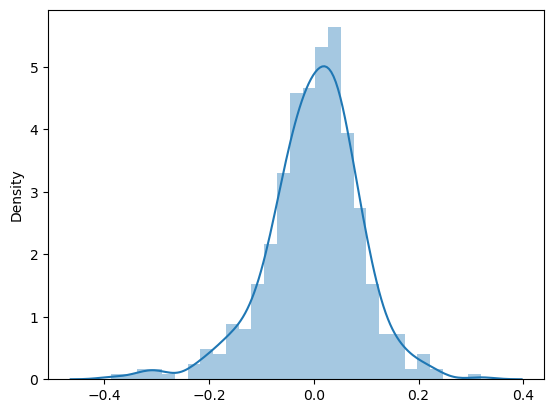

In [53]:
# Lets  check the evaluate the model on Normality assumption of residuals
#check the train residuals are normally distributed or not 
res_train = y_train- y_train_pred
sns.distplot(res_train)


<Axes: ylabel='Density'>

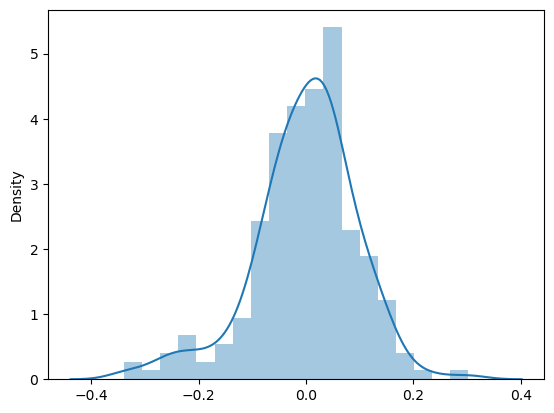

In [56]:
#check the test residuals are normally distributed or not 
res_test = y_test- y_test_pred
sns.distplot(res_test)

Residuals appear normally distrbuted in both training and test sets 

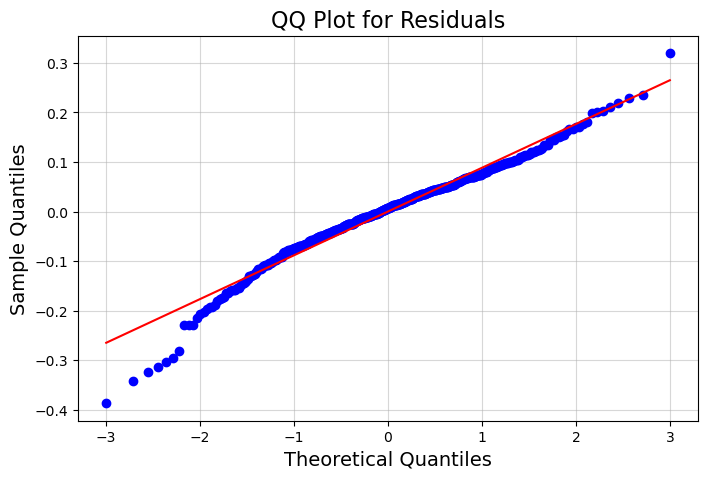

In [57]:
# Draw the QQ plot to check the normality of residuals

# Generate the QQ plot
from scipy import stats


plt.figure(figsize=(8, 5))
stats.probplot(res_train, dist="norm", plot=plt) # res_train = y_train- y_train_pred

# Add a title and customize labels
plt.title("QQ Plot for Residuals", fontsize=16)
plt.xlabel("Theoretical Quantiles", fontsize=14)
plt.ylabel("Sample Quantiles", fontsize=14)
plt.grid(alpha=0.5)  # Add a light grid for better readability

# Show the plot
plt.show()



The residuals are mostly normal as per the QQ plot also , except for long left tail

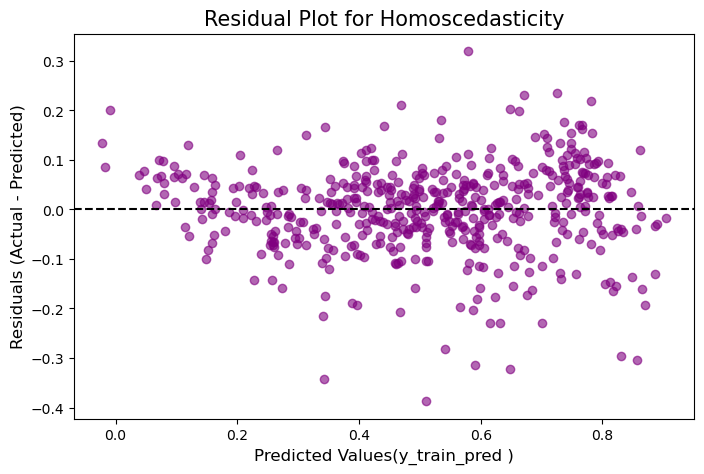

In [58]:
# checking the homoscedasticity of residuals - residuals should be equally spread across the regression line

# Residual Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_train_pred, res_train, color='purple', alpha=0.6, label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Error Line')
plt.title('Residual Plot for Homoscedasticity', fontsize=15)
plt.xlabel('Predicted Values(y_train_pred )', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.show()

As the residuals maintain almost constant variance, the model is said to be homoscedastic

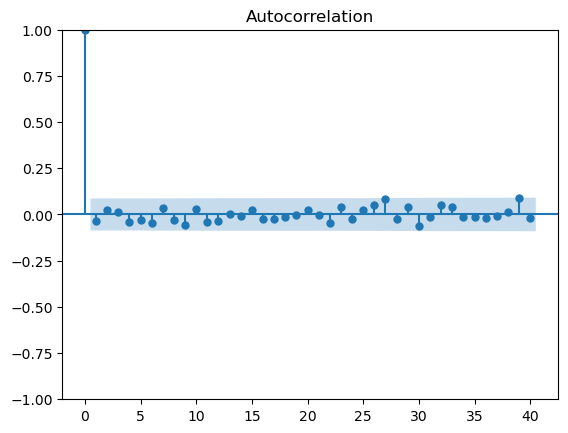

In [59]:
# checking the independence of residuals - residuals should not have any pattern i.e. residuals are  are not correlated with one another.
# Done through ACf plot
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(res_train, lags=40 , alpha=0.05)
acf.show()


 Thhough this analysis is not that relevant as its not time series data. The residuals are independent as there is no pattern in the ACF plot. Except for the first lag, all other lags are within the confidence interval.

In [60]:
# Generate the multiple linear regression equation 
# Extracting the coefficients
coefficients = lr2.params

# # Generating the linear regression equation
equation = "cnt = " + " + ".join([f"{coeff:.2f}*{name}" for name, coeff in coefficients.items()])
print(equation)

cnt = 0.26*const + 0.23*yr + -0.09*holiday + 0.55*temp + -0.17*hum + -0.20*windspeed + 0.07*season_summer + 0.14*season_winter + -0.03*mnth_Dec + -0.05*mnth_Jan + -0.05*mnth_Jul + -0.03*mnth_Nov + 0.09*mnth_Sep + -0.05*weathersit_cloudy_mist + -0.24*weathersit_light_snow


Equation 

cnt = 0.26*const + 0.23*yr + -0.09*holiday + 0.55*temp + -0.17*hum + -0.20*windspeed + 0.07*season_summer + 0.14*season_winter + -0.03*mnth_Dec + -0.05*mnth_Jan + -0.05*mnth_Jul + -0.03*mnth_Nov + 0.09*mnth_Sep + -0.05*weathersit_cloudy_mist + -0.24*weathersit_light_snow 




## Interpretation:

1. Temperture variable has the highest coefficient 0.57, impacting the bike rentals most . With rest all constant 1 degree increase in temprature increases bike rentals by 0.57
2. Year had a high coefficient of 2006 of 0.23. Making that there has been sharp increasing trend in rentals from 2018 to 2019
3. Weather is next most dicisieve factor with both cloudy-mist or light snow having negative impact on the bike rentals
4. Fall is the best season and Sep is best month for bike rentals. Company can consider discounts in winters followed by summmer
5. Inresting fact was holidays had a negative impact  -0.0912. So more people use bike for office works so the company can target more bike points in business districts, office zones rather than leisure points   